In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pylab as plt

%matplotlib notebook

## Cargar csv

In [2]:
file = "../cardio_dosis_data/CARDIOLOGIA DF_H.csv"
originaldf = pd.read_csv(file)
#print(originaldf.head())
originaldf.isin(['NaN']).any()

NUMERO                             False
DIA                                False
MES                                False
AÑO                                False
INICIO                             False
TERMINO                            False
GENERO                             False
EDAD                               False
PESO                               False
TALLA                              False
IMC                                False
EXPEDIENTE                         False
DIAGNOSTICO 1                      False
DIAGNOSTICO 2                      False
DIAGNOSTICO 3                      False
DIAGNOSTICO 4                      False
PROCEDIMIENTO                      False
CORONARIOGRAFIA                    False
VENTRICULOGRAMA                    False
AORTOGRAMA                         False
ACTP                               False
EXTRACCION TROMBO                  False
ARTERIOGRAFIA RENALES              False
CATETERISMO           DER - IZQ    False
GASOMETRIAS     

In [3]:
print(len(originaldf))
originaldf.loc[:,'IMC']
#float(originaldf.loc[5,'DIA'])*5 > 10

593


0      28.125000
1      27.600000
2      24.034610
3      39.792388
4      25.826446
         ...    
588    50.781250
589    30.486657
590    26.703624
591    48.059808
592    25.788534
Name: IMC, Length: 593, dtype: float64

In [4]:
imcateg=[]

for i in range(len(originaldf)):
    if float(originaldf.loc[i,'IMC']) < 18.5 :
        imcateg.append('B')
    elif float(originaldf.loc[i,'IMC']) <= 25:
        imcateg.append('N')
    elif float(originaldf.loc[i,'IMC']) <= 30:
        imcateg.append('S')
    else:
        imcateg.append('O')

originaldf['IMC_categorico'] = imcateg
originaldf

,NUMERO,DIA,MES,AÑO,INICIO,TERMINO,GENERO,EDAD,PESO,TALLA,...,VIA DE ACCESO 2,TIEMPO,mGy,pGym,IMÁGENES,CUADROS POR SEGUNDO,PULSOS POR SEGUNDO,CONSECUTIVO,CONTRASTE,IMC_categorico
0,1,1,3,2018,11:55,13:15,0,75,72.0,1.60,...,NaN,3.25,85.0,4209.9,3,7.5,15.0,6405,0,S
1,2,1,3,2018,19:00,20:00,0,49,78.0,1.68,...,NaN,7.60,1301.0,8858.6,18,7.5,15.0,6406,120,S
2,3,5,3,2018,17:00,19:00,1,78,60.0,1.58,...,NaN,10.04,128.0,6979.5,5,7.5,15.0,6407,0,N
3,4,6,3,2018,17:00,19:16,0,48,115.0,1.70,...,NaN,30.60,1906.0,22416.8,13,7.5,15.0,6410,230,O
4,5,7,3,2018,9:20,10:10,1,81,80.0,1.76,...,NaN,2.45,206.0,1026.5,11,7.5,15.0,6411,100,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,589,25,2,2019,9:10,12:15,0,60,130.0,1.60,...,NaN,20.09,1683.0,21024.0,13,7.5,15.0,7192,150,O
589,590,25,2,2019,12:58,13:22,0,62,81.0,1.63,...,NaN,4.17,429.0,2296.0,12,7.5,15.0,7193,95,O
590,591,25,2,2019,13:35,14:15,0,55,79.0,1.72,...,NaN,4.14,862.0,2729.4,16,7.5,15.0,7194,225,S
591,592,26,2,2019,17:50,19:00,1,63,54.0,1.06,...,F+D,9.90,442.0,3740.4,19,7.5,15.0,7197,130,O


In [5]:
#data = pd.read_csv(file, usecols={'EDAD','PESO', 'GENERO','TALLA', 'TIEMPO','mGy','pGym','IMÁGENES','CUADROS POR SEGUNDO','PULSOS POR SEGUNDO', 'CONTRASTE'})
#df = pd.read_csv(file, 
#                   usecols={'EDAD','PESO', 'TALLA',
#                            'TIEMPO','mGy','pGym', 'IMÁGENES'})
#df = pd.read_csv(file, 
#                 usecols={'TIEMPO','mGy', 
#                                  'IMÁGENES', 'CUADROS POR SEGUNDO', 'CONTRASTE'})
df = originaldf.loc[:,['TIEMPO','mGy',\
                                  'IMÁGENES', 'CUADROS POR SEGUNDO', 'CONTRASTE']]
df.head()

,TIEMPO,mGy,IMÁGENES,CUADROS POR SEGUNDO,CONTRASTE
0,3.25,85.0,3,7.5,0
1,7.60,1301.0,18,7.5,120
2,10.04,128.0,5,7.5,0
3,30.60,1906.0,13,7.5,230
4,2.45,206.0,11,7.5,100


### Probando si hay valores nulos:

In [6]:
type(df)
df.isin(['NaN']).any()

TIEMPO                 False
mGy                    False
IMÁGENES               False
CUADROS POR SEGUNDO    False
CONTRASTE              False
dtype: bool

In [7]:
df_val = df.values
len(df_val)

593

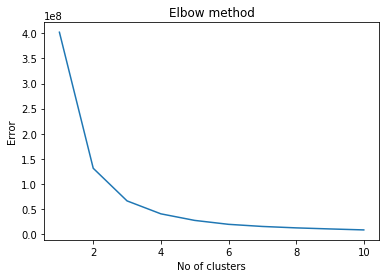

In [8]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(df_val)
    kmeans.fit(df_val)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [9]:
k_clusters = 4

kmeans = KMeans(n_clusters = k_clusters)
y_kmeans = kmeans.fit_predict(df_val)
print(y_kmeans)

kmeans.cluster_centers_


[0 2 0 1 0 0 0 0 0 2 2 0 2 2 2 2 0 0 0 0 2 1 1 2 2 1 0 2 1 2 0 0 3 1 0 2 1
 2 0 0 2 0 0 3 0 1 1 0 0 2 2 0 2 0 0 0 0 2 0 0 2 0 0 0 2 1 2 2 2 0 2 0 0 1
 2 0 0 0 0 0 0 0 0 1 1 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 2 0 1 2 0 0 1 0 0 0
 0 0 0 0 0 3 1 0 2 2 0 2 0 2 0 3 0 3 0 0 2 0 0 2 1 1 0 0 2 0 1 0 0 0 0 0 0
 0 0 2 2 2 0 0 0 1 0 0 1 0 0 1 1 2 0 0 2 1 0 2 0 0 0 1 1 2 0 2 2 1 1 0 0 2
 2 0 2 0 0 0 0 0 1 0 0 0 3 0 2 0 2 1 0 0 0 0 3 1 0 2 2 0 2 0 0 3 0 0 2 2 1
 0 0 1 2 0 0 0 2 2 2 0 2 0 1 2 1 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2
 0 0 0 0 2 2 2 2 2 0 1 2 0 0 0 2 2 2 2 2 0 2 0 0 0 2 1 0 0 0 0 0 0 0 1 0 2
 0 0 0 2 3 1 0 0 2 0 0 2 0 0 2 0 0 1 0 2 0 0 2 2 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 0 2 0 0 0 0 0 1 2 0 0 0 0 0 0 2 0 2 0 2 0 2 2 0 0 0 2 0 1 0 0 2 0
 1 1 0 0 0 0 1 2 0 0 0 0 0 3 0 0 0 2 0 0 3 0 0 0 0 1 0 0 0 2 0 0 0 2 0 2 0
 2 0 2 0 0 2 0 2 2 1 0 0 2 1 0 1 2 0 0 0 2 0 0 0 0 2 0 2 2 0 2 0 0 0 0 0 2
 0 0 0 1 1 2 1 0 0 1 0 1 2 3 1 0 0 0 0 2 0 0 0 0 0 1 3 2 0 2 1 2 2 2 0 1 0
 0 0 0 0 2 0 0 2 2 0 1 0 

array([[   5.6217847 ,  280.19376771,    9.79320113,    7.53541076,
          48.11331445],
       [  21.36614286, 2155.48571429,   27.74285714,    7.66428571,
         179.07142857],
       [  11.88006452, 1063.33419355,   19.9483871 ,    7.74516129,
         120.61935484],
       [  31.03866667, 3693.2       ,   38.66666667,    7.5       ,
         260.46666667]])

In [10]:
lista = list(df)
centroidestxt = open('centroides.txt', 'w')
print(lista)
centroidestxt.write(str(lista))
centroidestxt.write("\n")
for i, item in enumerate(kmeans.cluster_centers_):
    print("Centro del centroide No {} es: \n {} \n".format(i+1, item))
    centroidestxt.write("Centro del centroide No {} es: \n {} \n".format(i+1, item))

centroidestxt.close()

['TIEMPO', 'mGy', 'IMÁGENES', 'CUADROS POR SEGUNDO', 'CONTRASTE']
Centro del centroide No 1 es: 
 [  5.6217847  280.19376771   9.79320113   7.53541076  48.11331445] 

Centro del centroide No 2 es: 
 [  21.36614286 2155.48571429   27.74285714    7.66428571  179.07142857] 

Centro del centroide No 3 es: 
 [  11.88006452 1063.33419355   19.9483871     7.74516129  120.61935484] 

Centro del centroide No 4 es: 
 [  31.03866667 3693.2          38.66666667    7.5         260.46666667] 



In [11]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = df.index.values
cluster_map['cluster'] = kmeans.labels_

clusterlist = []

for i in range(k_clusters):
    clusterlist.append(cluster_map[cluster_map.cluster == i])
    print("Elementos en cluster {} : {}".format(i+1, len(clusterlist[i])))
    index_elements = clusterlist[i]['data_index']
    clusterlist[i]['data_index'].to_csv('indices_cluster_'+str(i+1)+'.txt', 
                                  header=True, index=None, sep='\n')
#cluster1 = cluster_map[cluster_map.cluster == 0]
#cluster2 = cluster_map[cluster_map.cluster == 1]
#cluster3 = cluster_map[cluster_map.cluster == 2]
#cluster4 = cluster_map[cluster_map.cluster == 3]

Elementos en cluster 1 : 353
Elementos en cluster 2 : 70
Elementos en cluster 3 : 155
Elementos en cluster 4 : 15


In [12]:
clusterlist[0]['data_index']

0        0
2        2
4        4
5        5
6        6
      ... 
582    582
587    587
589    589
591    591
592    592
Name: data_index, Length: 353, dtype: int64

In [13]:
clusterlist[1]['data_index']

3        3
21      21
22      22
25      25
28      28
      ... 
529    529
566    566
579    579
583    583
588    588
Name: data_index, Length: 70, dtype: int64

In [14]:
clusterlist[2]['data_index']

1        1
9        9
10      10
12      12
13      13
      ... 
581    581
584    584
585    585
586    586
590    590
Name: data_index, Length: 155, dtype: int64

In [15]:
clusterlist[3]['data_index']
type(clusterlist[3]['data_index'])
list(clusterlist[3]['data_index'])


[32, 43, 116, 126, 128, 197, 207, 216, 300, 383, 390, 457, 470, 527, 544]

In [19]:
clusternumbers = []


for i in range(len(originaldf)):
    if int(originaldf.loc[i,'NUMERO'])-1 in list(clusterlist[0]['data_index']):
        clusternumbers.append(1)
    elif int(originaldf.loc[i,'NUMERO'])-1 in list(clusterlist[1]['data_index']):
        clusternumbers.append(2)
    elif int(originaldf.loc[i,'NUMERO'])-1 in list(clusterlist[2]['data_index']):
        clusternumbers.append(3)
    elif int(originaldf.loc[i,'NUMERO'])-1 in list(clusterlist[3]['data_index']):
        clusternumbers.append(4)


originaldf['Cluster No'] = clusternumbers
originaldf.to_csv("../cardio_dosis_data/cardio_clean_clustering_IMC.csv", sep = ",")
originaldf

,NUMERO,DIA,MES,AÑO,INICIO,TERMINO,GENERO,EDAD,PESO,TALLA,...,TIEMPO,mGy,pGym,IMÁGENES,CUADROS POR SEGUNDO,PULSOS POR SEGUNDO,CONSECUTIVO,CONTRASTE,IMC_categorico,Cluster No
0,1,1,3,2018,11:55,13:15,0,75,72.0,1.60,...,3.25,85.0,4209.9,3,7.5,15.0,6405,0,S,1
1,2,1,3,2018,19:00,20:00,0,49,78.0,1.68,...,7.60,1301.0,8858.6,18,7.5,15.0,6406,120,S,3
2,3,5,3,2018,17:00,19:00,1,78,60.0,1.58,...,10.04,128.0,6979.5,5,7.5,15.0,6407,0,N,1
3,4,6,3,2018,17:00,19:16,0,48,115.0,1.70,...,30.60,1906.0,22416.8,13,7.5,15.0,6410,230,O,2
4,5,7,3,2018,9:20,10:10,1,81,80.0,1.76,...,2.45,206.0,1026.5,11,7.5,15.0,6411,100,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,589,25,2,2019,9:10,12:15,0,60,130.0,1.60,...,20.09,1683.0,21024.0,13,7.5,15.0,7192,150,O,2
589,590,25,2,2019,12:58,13:22,0,62,81.0,1.63,...,4.17,429.0,2296.0,12,7.5,15.0,7193,95,O,1
590,591,25,2,2019,13:35,14:15,0,55,79.0,1.72,...,4.14,862.0,2729.4,16,7.5,15.0,7194,225,S,3
591,592,26,2,2019,17:50,19:00,1,63,54.0,1.06,...,9.90,442.0,3740.4,19,7.5,15.0,7197,130,O,1


In [27]:
#conteo_proc = [[0s c1,1s c1],[0s c2,1s c2],[0s c3,1s c3],[0s c4,1s c4]]
conteo_proc = [[0,0],[0,0],[0,0],[0,0]]
for i in range(len(originaldf)):
    if originaldf.loc[i,'PROCEDIMIENTO'] == 0:
        if originaldf.loc[i,'Cluster No'] == 1:
            conteo_proc[0][0]+=1
        elif originaldf.loc[i,'Cluster No'] == 2:
            conteo_proc[1][0]+=1
        elif originaldf.loc[i,'Cluster No'] == 3:
            conteo_proc[2][0]+=1
        elif originaldf.loc[i,'Cluster No'] == 4:
            conteo_proc[3][0]+=1
    else:
        if originaldf.loc[i,'Cluster No'] == 1:
            conteo_proc[0][1]+=1
        elif originaldf.loc[i,'Cluster No'] == 2:
            conteo_proc[1][1]+=1
        elif originaldf.loc[i,'Cluster No'] == 3:
            conteo_proc[2][1]+=1
        elif originaldf.loc[i,'Cluster No'] == 4:
            conteo_proc[3][1]+=1

In [31]:
for i, item in enumerate(conteo_proc):
    print("""Para el cluster {} hay:
            {} elementos con procedimiento 0 y 
            {} con procedimiento 1 \n""".format(i+1, conteo_proc[i][0],conteo_proc[i][1]))

Para el cluster 1 hay:
            199 elementos con procedimiento 0 y 
            154 con procedimiento 1 

Para el cluster 2 hay:
            6 elementos con procedimiento 0 y 
            64 con procedimiento 1 

Para el cluster 3 hay:
            62 elementos con procedimiento 0 y 
            93 con procedimiento 1 

Para el cluster 4 hay:
            0 elementos con procedimiento 0 y 
            15 con procedimiento 1 

